In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [2]:
# START (Question asked : Machine Learning)-> TITLE CREATOR (Take the question and generate the title) -> CONTENT (Take the Title and Generate the Content)-> END (Display)

from langchain_core.tools import tool
from langgraph.graph import MessagesState
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [3]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o-mini")

In [ ]:
# # This will be a tool
# def add(a: int, b: int) -> int:
#     """Adds a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a + b

In [ ]:
from langchain_openai import ChatOpenAI
# tools=[add]

llm=ChatOpenAI(model="gpt-4o")
# llm_with_tools=llm.bind_tools(tools,parallel_tool_calls=False)



In [4]:
from langchain_core.messages import HumanMessage, SystemMessage

## Title Assistant
system_message_title = SystemMessage(
    content=(
        "You are an intelligent blog title generator. Your task is to create catchy, engaging, "
        "and relevant single title based on the subject or text provided to you. Ensure that the titles "
        "are concise, informative, and tailored to attract readers' attention. Aim for creativity "
        "while maintaining clarity and relevance to the topic at hand."
    )
)
def title_assistant(state:MessagesState):
    return {"messages":[llm.invoke([system_message_title] + state["messages"])]}

## Blog Content Assistant
system_message_content = SystemMessage(
    content=(
        "You are a blog content generator. Your task is to create informative, engaging, and "
        "well-structured content based on the title provided to you. Ensure that the content is "
        "relevant, coherent, and tailored to the target audience. Aim for clarity, depth, and "
        "engagement while maintaining a high level of quality and accuracy."
    )
)
def content_assistant(state:MessagesState):
    return {"messages":[llm.invoke([system_message_content] + state["messages"])]}

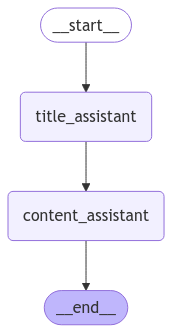

In [5]:
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

builder=StateGraph(MessagesState)

# Define the nodes
builder.add_node("title_assistant", title_assistant)
builder.add_node("content_assistant", content_assistant)
# builder.add_node("tools",ToolNode(tools))

# Define the edges
builder.add_edge(START, "title_assistant")
builder.add_edge("title_assistant", "content_assistant")
# builder.add_conditional_edges(
#     "content_assistant",
#     # If the latest message (result) from content_assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from content_assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# builder.add_edge("tools","content_assistant")
builder.add_edge("content_assistant", END)



react_graph=builder.compile()

# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [8]:
import time
start_time = time.time()
messages = [HumanMessage(content="Generate a blog for AI Agents")]
messages = react_graph.invoke({"messages": messages})
print(time.time() - start_time)

11.90680193901062


In [9]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Generate a blog for AI Agents
================================== Ai Message ==================================

"Unleashing the Future: How AI Agents Are Transforming Our World"
================================== Ai Message ==================================

### Unleashing the Future: How AI Agents Are Transforming Our World

In recent years, artificial intelligence (AI) has transitioned from a futuristic concept to a practical reality. Among the most groundbreaking developments in AI technology are AI agents, autonomous systems capable of performing tasks, making decisions, and interacting with human users. From personal assistants to complex problem solvers, AI agents have the potential to revolutionize various aspects of our lives. In this blog, we will explore what AI agents are, how they function, and the myriad ways they are transforming industries and everyday life.

#### What Are AI Agents?

AI a